## matplotlib 시각화

In [ ]:
# import matplotlib as mpl
import matplotlib
print(matplotlib.__version__)

3.2.2


## 그래프 그리기

In [ ]:
dates = [
    '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
    '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'
]
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]
avg_temperature = [25, 25, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]

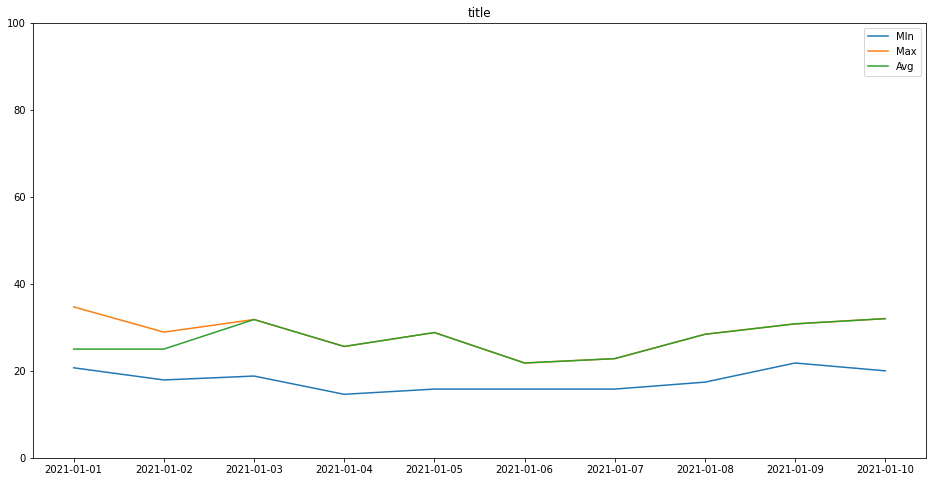

In [ ]:
import matplotlib.pyplot as plt
# 객체 지향 문법
# fig, ax = plt.subplots() # 기본 뼈대
# 다양한 그래프 작성 방법 존재
fig, ax = plt.subplots(figsize=(16, 8))
# figsize=(x길이, y길이) = 그래프 사이즈 

# 다양한 형태의 데이터를 입력 받을 수 있음
#        x            y
ax.plot(dates, min_temperature, label='MIn')
ax.plot(dates, max_temperature, label='Max')
ax.plot(dates, avg_temperature, label='Avg')
ax.set_ylim(0, 100) # y범위 조정
ax.set_title('title') # title
ax.legend() # 범례
plt.show()


In [ ]:
# 문서에서 찾을 때 요긴함
print(type(ax))

<class 'matplotlib.axes._subplots.AxesSubplot'>


## 막대 그래프 그리기

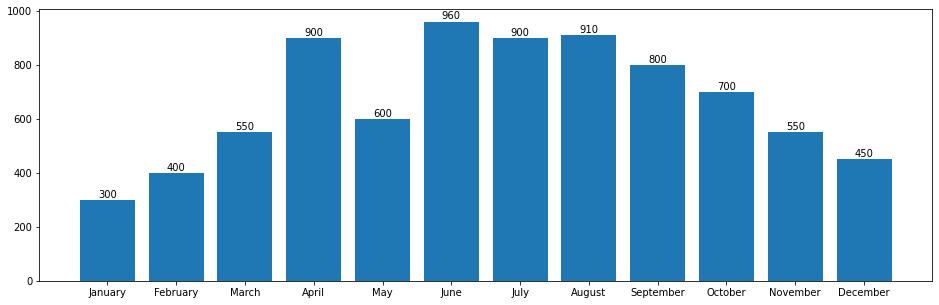

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import calendar

month_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
sold_list = [300, 400, 550, 900, 600, 960, 900, 910, 800, 700, 550, 450]

labels = calendar.month_name[1:13]
# print(labels)

fig, ax = plt.subplots(figsize = (16, 5))
plot = ax.bar(month_list, sold_list)
# print("Plot : ", plot)
# ax.set_xticks(month_list, labels) # 그래프 위 표기 # 버전 차이로 오류남
for rect in plot: # 그래프 위 표기
  # print(rect)
  # print(type(rect))
  # print(rect.get_height())
  height = rect.get_height()
  ax.text(rect.get_x() + rect.get_width()/2., 1.002*height,'%d' % 
          int(height), ha='center', va='bottom')

plt.xticks(month_list, labels)
plt.show()

## Seaborn
- 실패한 라이브러리
- 배경 : pandas 데이터 프레임에서 한방에 시각화를 하는 방법이 없나?
- R, ggplot2

In [ ]:
import seaborn as sns # as sb
print(sns.__version__)

0.11.2


In [ ]:
titanic = sns.load_dataset('titanic')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


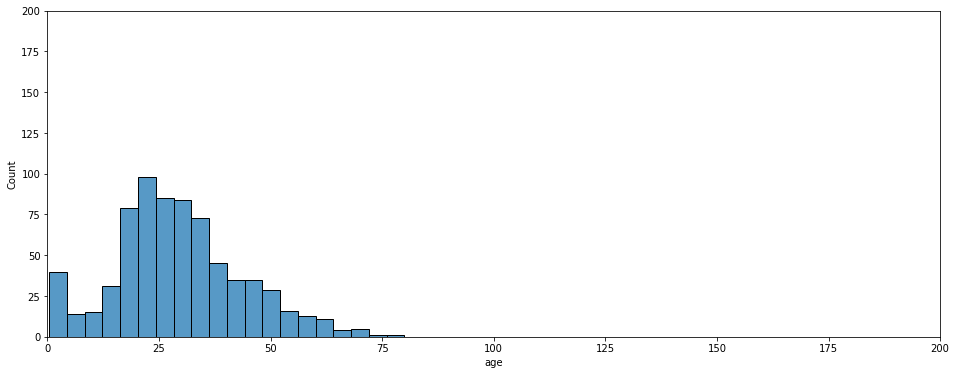

In [ ]:
# plot = sns.displot(titanic, x="age") # 사이즈 조절 기능 없음(style) ==> matplotlib으로 회귀(style 사용)
# print(type(plot))

fig, ax = plt.subplots(figsize=(16,6)) # matplotlib
# plot = sns.histplot(titanic, x='age', ax= ax)
# print(plot)
# print(type(plot)) # matplotlib.axes._subplots.AxesSubplot
plot = sns.histplot(titanic, x='age', ax= ax) # seaborn
ax.set_xlim(0,200) # matplotlib
ax.set_ylim(0,200) # matplotlib
plt.show() # matplotlib


## BoxPlot

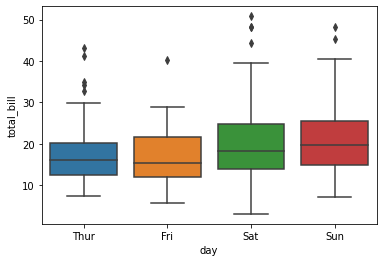

In [ ]:
tips = sns.load_dataset('tips')
tips
sns.boxplot(x='day', y='total_bill', data = tips)

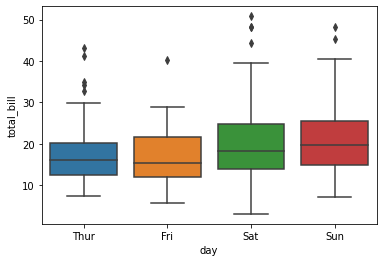

In [ ]:
sns.boxplot(x='day', y='total_bill', data = tips)
# 범위 벗어난 점들 == 이상치(outliner)/ 튀는 값
# 그룹 간 데이터 비교

## 산점도 그래프
- x와 y는 모두 숫자여야 함
- 년월일은 문자 취급

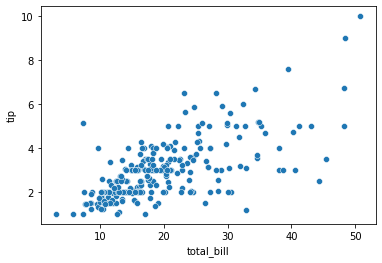

In [ ]:
sns.scatterplot(x='total_bill', y='tip',data=tips)
# 회귀모형

## 히트 맵

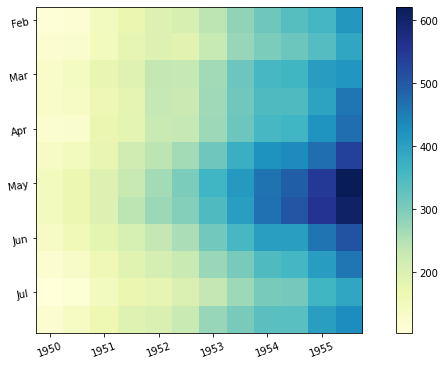

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")

fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(flights, cmap = 'YlGnBu')
ax.set_xticklabels(flights.columns, rotation = 20)
ax.set_yticklabels(flights.index, rotation = 10)
fig.colorbar(im)

fig.show()

## Plotly

In [ ]:
import plotly
print(plotly.__version__)

5.5.0


In [ ]:
# 방식 2가지
import plotly.graph_objects as go # Matplotlib와 비슷
import plotly.express as px # Seaborn와 비슷

In [ ]:
import plotly.graph_objects as go

weekly_sales = dict({
    "data": [{
        "type": "bar", 
        "x": ["Monday", "Tuesday", "Wednesday", "Thursday", 
              "Friday", "Saturday", "Sunday"], 
        "y": [28, 27, 25, 31, 32, 35, 36]
    }], 
    "layout" : {"title": {"text": "Sales of the week", 
                          "x": 0.5, "font": {"color": "red", "size": 15}}}
})

fig = go.Figure(weekly_sales)
fig.show()

In [ ]:
# x and y given as array_like objects
import plotly.express as px
fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
fig.show()

In [ ]:
fig = go.Figure()
#산점도
fig.add_scatter(x=[1,2,3], y= [3,2,1])
fig.add_bar(x=[1,2,3], y= [3,2,1])
fig.show()

In [ ]:
fig.show('json')

- Documentation
  + https://plotly.com/python/reference/layout/

In [ ]:
# fig.update_layout(dictionary setting)

In [ ]:
fig.layout.title='그래프 제목'
fig.layout.title.font.size = 60
fig.layout.xaxis.title = 'x축 제목'
fig.layout.xaxis.title.font.size = 30
fig.layout.xaxis.title.font.color = '#231ED4'
fig.show()

## 테마 변경

In [ ]:
import plotly
plotly.io.templates

import plotly.graph_objects as go

weekly_sales = dict({
    "data": [{
        "type": "bar", 
        "x": ["Monday", "Tuesday", "Wednesday", "Thursday", 
              "Friday", "Saturday", "Sunday"], 
        "y": [28, 27, 25, 31, 32, 35, 36]
    }], 
})

fig = go.Figure(weekly_sales)

fig.layout.template = 'presentation'
fig.layout.template.layout.plot_bgcolor = '#FFCC00'
fig.layout.xaxis.gridcolor = '#0F3DB8'
fig.layout.xaxis.linecolor = 'black'
fig.layout.yaxis.linecolor = 'red'
fig.layout.yaxis.linewidth = 5
fig.show()

### express 방식

In [ ]:
iris = px.data.iris()
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   species_id    150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# import plotly.io as pio
# pio.renderers.default = "colab" colab에서 안될시
fig = px.scatter(iris, x='sepal_length', y= 'sepal_width')
fig.show()

In [ ]:
fig.add_bar(x=[1, 2, 3], y = [3, 2, 1])
fig.layout.title = '그래프 제목'
fig.layout.xaxis.title = 'X축 제목'
fig.layout.yaxis.title = 'y축 제목'
fig.layout.template.layout.plot_bgcolor = '#FFCC00'
fig.layout.xaxis.gridcolor = '#0F3DB8'
fig.layout.xaxis.linecolor = 'black'
fig.layout.yaxis.linecolor = 'red'
fig.layout.yaxis.linewidth = 5
fig.show()